# Data Preprocessing

## 1. Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.DataFrame([[1,2,3,4],[5,6,np.nan,8],[10,11,12,np.nan]])

In [38]:
df.columns = ['A','B','C','D']

In [39]:
df

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


### 1.1 Drop missing data

In [17]:
# axis = 0: drop the row with na
df.dropna(axis = 0)
# axis = 1: drop the columns with na
df.dropna(axis = 1)

,A,B
0,1,2
1,5,6
2,10,11


In [24]:
df.dropna(how= "all") # drop the row with all na
df.dropna(how= "any") # drop the row with any na
df.dropna(subset= ['C'])

,A,B,C,D
0,1,2,3.0,4.0
2,10,11,12.0,NaN


### 1.2 Imputing

In [27]:
# axis = 0 : column mean
# axis = 1 : row mean
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN', strategy = "mean", axis = 1)
imr = imr.fit_transform(df)
imr

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

## 2. Handing Categorical data

Nominal : string can't be ordered (read !> blue)    
Ordinal : string can be ordered (XL>L>M)  

In [40]:
import pandas as pd
df = pd.DataFrame([['green','M',10.1,'class1'],['red','L',13.5,'class2'],['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']

In [41]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 2.1 Mapping ordinal feature

In [42]:
# mapping ordinal features
size_map = {'XL':3,'L':2,'M':1}
df['size'] = df['size'].map(size_map)

In [43]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### 2.2 Encoding class label

In [33]:
# Encoding class labels
class_map = {'class1':0,'class2':1}
df['classlabel'] = df['classlabel'].map(class_map)

In [45]:
# Encoding class labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['classlabel'] = le.fit_transform(df['classlabel'].values)

In [46]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## 3. One-hot encoding on nominal feature

In [72]:
X = df[['color','size','price']].values

In [75]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [74]:
X[0,0] = 1
X[1,0] = 2
X[2,0] = 0

In [76]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [77]:
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


## 4. Partitioning

In [78]:
df_wine = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [82]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [83]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:],df_wine.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

## 5. Scale

Normalization : [0,1]    MinMaxScaler()
  
Standardization : mean 0, std 1.  StandardScaler()  
adv: 
1. many linear model(SVM, LR) initialize weights colose to 0, easier to leanr the weights.  
2. standardization maintains outliesr information

## 6. L1 Regularization VS L2 Regularization

L1 leads to sparse solutions  
Reference : The elements of statistical learning

In [99]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', C = 0.1)
lr.fit(X_train_std,y_train)
lr.score(X_train_std,y_train)

0.9838709677419355

In [100]:
lr.score(X_test_std,y_test)

0.9814814814814815

In [101]:
lr.intercept_

array([-0.3838086 , -0.15813917, -0.70042999])

In [102]:
lr.coef_

array([[ 0.28012932,  0.        ,  0.        , -0.02761253,  0.        ,
         0.        ,  0.71011454,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23655758],
       [-0.64374286, -0.06897223, -0.05716151,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92728752,
         0.05977171,  0.        , -0.37099865],
       [ 0.        ,  0.06160428,  0.        ,  0.        ,  0.        ,
         0.        , -0.635611  ,  0.        ,  0.        ,  0.49787702,
        -0.35833916, -0.57152255,  0.        ]])

In [103]:
lr.coef_.shape

(3, 13)

In [104]:
lr.coef_[1]

array([-0.64374286, -0.06897223, -0.05716151,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.92728752,
        0.05977171,  0.        , -0.37099865])

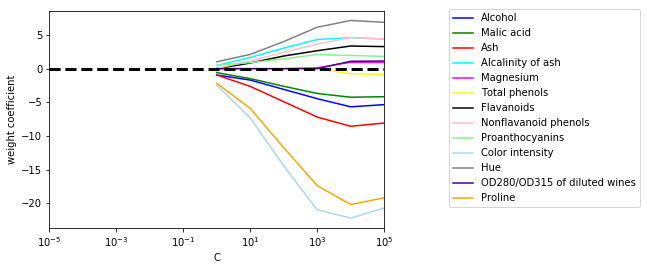

In [130]:
# Plot the regularization path
# C bigger , regularziation parameter lower, coef higher.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights,params = [],[]
for c in np.arange(0,6):
    lr = LogisticRegression(penalty='l1',C = 10 ** c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)
weights = np.array(weights)
for col,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,col],
            label = df_wine.columns[col+1],
            color = color)
plt.axhline(0,color = 'black',linestyle = '--',linewidth = 3) # 虚线
plt.xlim([10 ** (-5), 10 ** 5])
plt.xscale('log')
plt.legend()
plt.xlabel("C")
plt.ylabel("weight coefficient")
ax.legend(loc = 'upper right',bbox_to_anchor = (1.78,1.03),ncol = 1,fancybox = True)


## 7. Feature Selection

Feature Selection: subset features  
Feature Extraction: new feature creatation

## 8. SBS

Sequential Backward Selection: 
1. reduce the dimensionality of initial featue subspace with a minnimum decay in performance of the clssifier to improve upon computational efficiency.  
2. improve the predictive power of the model if a model suffers from overfitting.

In [131]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# Sequential Backward Selection


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [132]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

In [133]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

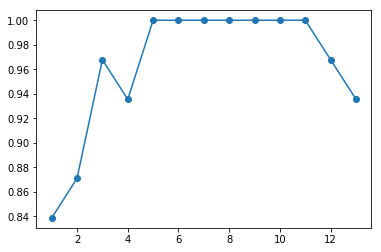

In [140]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker= 'o')

In [145]:
k5 = list(sbs.subsets_[8])
df_wine.columns[1:][k5]

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')

In [147]:
knn.fit(X_train_std,y_train)
print("training accurancy: {}".format(knn.score(X_train_std,y_train)))
print("test accurancy: {}".format(knn.score(X_test_std,y_test)))

training accurancy: 0.9838709677419355
test accurancy: 0.9444444444444444


In [148]:
knn.fit(X_train_std[:,k5],y_train)
print("training accurancy: {}".format(knn.score(X_train_std[:,k5],y_train)))
print("test accurancy: {}".format(knn.score(X_test_std[:,k5],y_test)))

training accurancy: 0.9596774193548387
test accurancy: 0.9629629629629629


## 9. Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]

In [154]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
importance = forest.feature_importances_
importance

array([0.0887468 , 0.02978162, 0.01663817, 0.03918994, 0.02296177,
       0.06157894, 0.14522827, 0.01425818, 0.02310746, 0.19481937,
       0.08026645, 0.11907506, 0.16434795])

In [175]:
indices = np.argsort(importance)[::-1]
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  2,  7])

In [174]:
feature_importance

[('Alcohol', 0.0887468041746468),
 ('Malic acid', 0.029781622258334296),
 ('Ash', 0.016638165022420513),
 ('Alcalinity of ash', 0.0391899448963893),
 ('Magnesium', 0.02296176896689),
 ('Total phenols', 0.061578943355247),
 ('Flavanoids', 0.14522827154746742),
 ('Nonflavanoid phenols', 0.0142581787369171),
 ('Proanthocyanins', 0.023107461301916703),
 ('Color intensity', 0.19481936739572972),
 ('Hue', 0.08026645353404332),
 ('OD280/OD315 of diluted wines', 0.1190750644269484),
 ('Proline', 0.16434795438304955)]

([<matplotlib.axis.XTick at 0x120e34908>,
 <a list of 13 Text xticklabel objects>)

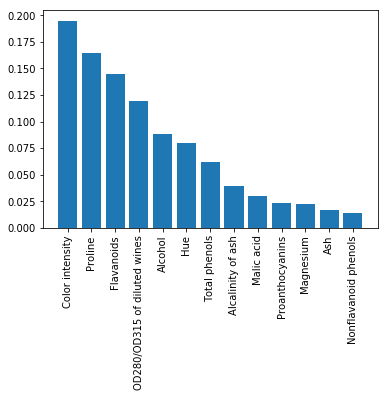

In [181]:
plt.bar(range(X_train.shape[1]),importance[indices])
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation = 90)